In [108]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [109]:
train_data = pd.read_csv("C:\\Users\\Nitu Agarwal\\Downloads\\TrainingData.csv")
train_data = np.array(train_data)
m, n = train_data.shape
data_train = train_data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255.
_,m_train = X_train.shape

In [110]:
Y_train

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [111]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [112]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50000 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [113]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000000)

Iteration:  0
[0 0 0 ... 0 0 0] [0 0 0 ... 9 9 9]
0.10125
Iteration:  50000
[0 5 5 ... 5 9 9] [0 0 0 ... 9 9 9]
0.4025
Iteration:  100000
[0 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.47775
Iteration:  150000
[0 5 7 ... 7 9 1] [0 0 0 ... 9 9 9]
0.488125
Iteration:  200000
[0 5 5 ... 9 9 9] [0 0 0 ... 9 9 9]
0.526875
Iteration:  250000
[0 5 5 ... 9 9 9] [0 0 0 ... 9 9 9]
0.528
Iteration:  300000
[0 5 5 ... 9 9 9] [0 0 0 ... 9 9 9]
0.554875
Iteration:  350000
[0 5 5 ... 9 9 0] [0 0 0 ... 9 9 9]
0.535375
Iteration:  400000
[0 5 5 ... 9 9 9] [0 0 0 ... 9 9 9]
0.54575
Iteration:  450000
[0 5 5 ... 9 9 9] [0 0 0 ... 9 9 9]
0.575125
Iteration:  500000
[0 8 5 ... 9 9 9] [0 0 0 ... 9 9 9]
0.554875
Iteration:  550000
[0 5 5 ... 9 9 9] [0 0 0 ... 9 9 9]
0.5735
Iteration:  600000
[0 5 5 ... 9 9 9] [0 0 0 ... 9 9 9]
0.58025
Iteration:  650000
[0 8 5 ... 9 9 9] [0 0 0 ... 9 9 9]
0.5815
Iteration:  700000
[0 7 5 ... 9 9 9] [0 0 0 ... 9 9 9]
0.56575
Iteration:  750000
[0 8 5 ... 9 9 9] [0 0 0 ... 9 9 9]
0.580

In [114]:
test_data = pd.read_csv("C:\\Users\\Nitu Agarwal\\Downloads\\TestingData.csv")
test_data = np.array(test_data)
m, n = test_data.shape
data_train = train_data.T
Y_test = data_train[0]
X_test = data_train[1:n]
X_test = X_test/255.
_,m_train = X_test.shape

In [115]:
Y_test

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [116]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


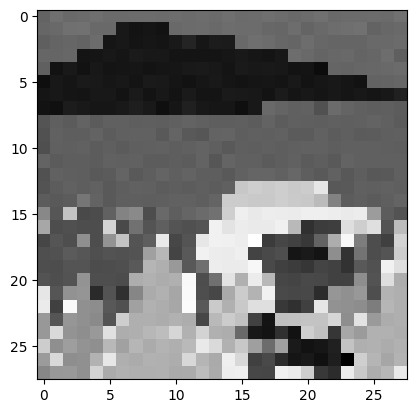

Prediction:  [5]
Label:  0


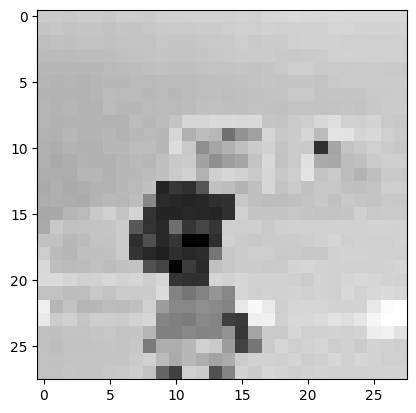

Prediction:  [5]
Label:  0


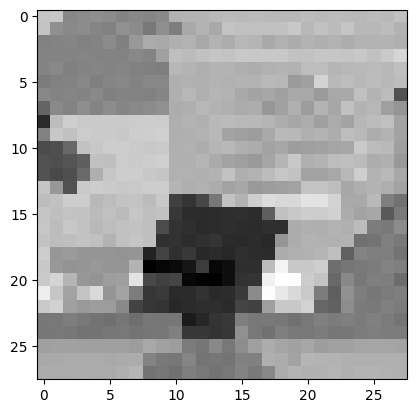

Prediction:  [1]
Label:  0


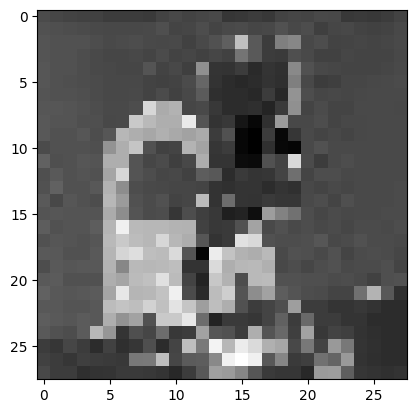

In [117]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [118]:
dev_predictions = make_predictions(X_train, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_train)

[0 5 5 ... 9 9 9] [0 0 0 ... 9 9 9]


0.57975